# DSCI 100: Project Proposal 

In [1]:
# libraries 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error: package or namespace load failed for ‘tidymodels’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘parsnip’


### 1. Introduction

Auditing is the examination of businesses financial records and the inspection that they align with standard accounting laws and principles (Hooda, 2018). Certain factors of a business or firm, such as historical discrepancy between a financial report and an audit inspection can help auditors identify those that are higher risk for fraudulent activity. This dataset contains information about 777 firms, each of which are either classified as “Fraud” firms, or “Non-fraud” firms. 

The dataset aims to aid in the auditing process, by providing insight into whether a particular firm is “high risk” (in which case auditors would want to visit the firm) or “low risk” (in which case auditors may skip visiting that firm). Some of the risk factors examined in the dataset include discrepancies in reports, historical discrepancy scores, and amounts of money involved in misstatements. With this dataset, we will implement a K-nearest-neighbors classification model to identify "Fraud" firms from unseen datasets.

### 2. Preliminary EDA

#### Feature Descriptions

| -**Inherent risk factors**- |                                                                                               | -**Control risk factors**- |                                                                                     |
|-----------------------|-----------------------------------------------------------------------------------------------------|----------------------|-------------------------------------------------------------------------------------------|
| **Feature**           | Information                                                                                         | **Feature**          | Information                                                                               |
| Para A value          | Discrepancy found in the planned-expenditure of inspection and summary report A in Rs (in crore).   | Sector score         | Historical risk score value of the target-unit in the Table 1 using analytical procedure. |
| Para B value          | Discrepancy found in the unplanned-expenditure of inspection and summary report B in Rs (in crore). | Loss                 | Amount of loss suffered by the firm last year.                                            |
| Total                 | Total amount of discrepancy found in other reports Rs (in crore).                                   | History              | Average historical loss suffered by firm in the last 10¬†years.                           |
| Number                | Historical discrepancy score.                                                                       | District score       | Historical risk score of a district in the last 10¬†years.                                |
| Money value           | Amount of money involved in misstatements in the past audits.                                       |                      |                                                                                           |
| **Other features**    |                                                                                                     |                      |                                                                                           |
| **Feature**           | Information                                                                                         | **Feature**          | Information                                                                               |
| Sector ID             | Unique ID of the target sector.                                                                     | Location ID          | Unique ID of the city/province.                                                           |
| ARS                   | Total risk score using analytical procedure.                                                        | Audit ID             | Unique Id assigned to an audit case.                                                      |
| Risk class            | Risk Class assigned to an audit-case. (Target Feature)                                              |                      |                                                                                           |

In [2]:
audit <- read_csv("audit_data/audit_risk.csv") 
audit <- audit |> mutate(Risk = as.factor(Risk), LOCATION_ID = as.factor(LOCATION_ID), History = as.factor(History))
head(audit)

New names:
• `Score_B` -> `Score_B...7`
• `Score_B` -> `Score_B...11`
Rows: 776 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (26): Sector_score, PARA_A, Score_A, Risk_A, PARA_B, Score_B...7, Risk_B...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B...7,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6,⋯,0.4,0,0.2,0,4.4,17.530,0.4,0.5,3.5060,1
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5,⋯,0.4,0,0.2,0,2.0,1.416,0.4,0.5,0.2832,0
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5,⋯,0.4,0,0.2,0,2.0,2.156,0.4,0.5,0.4312,0


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


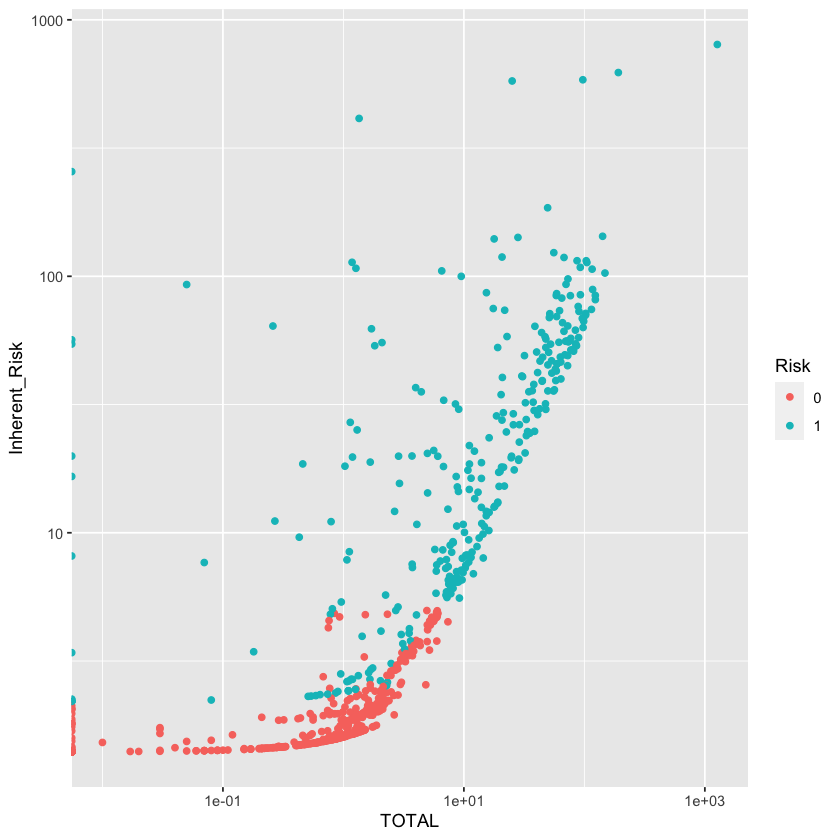

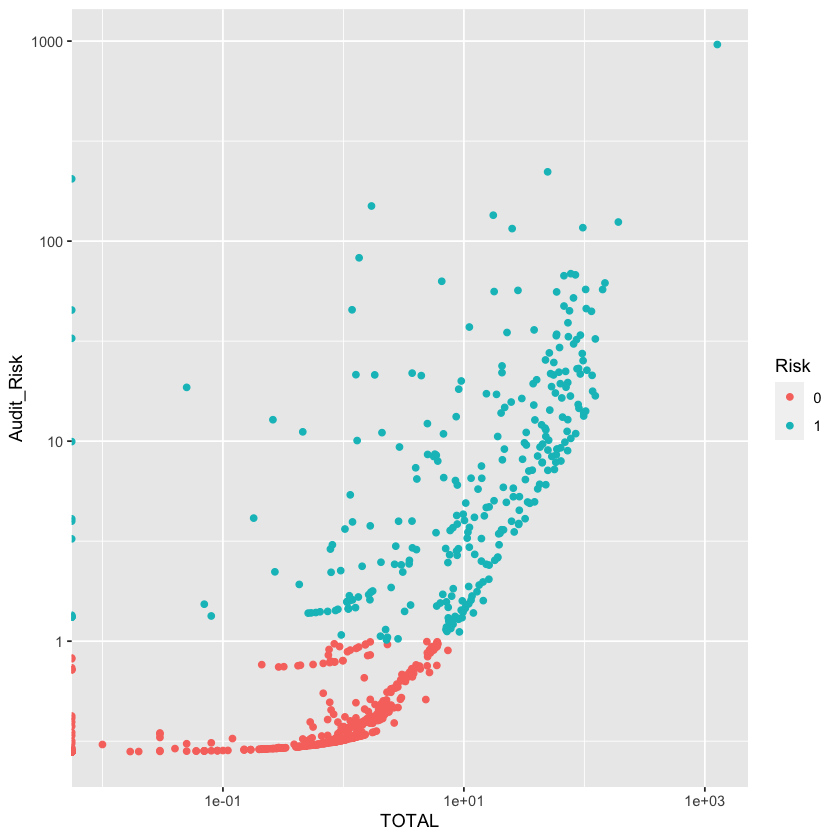

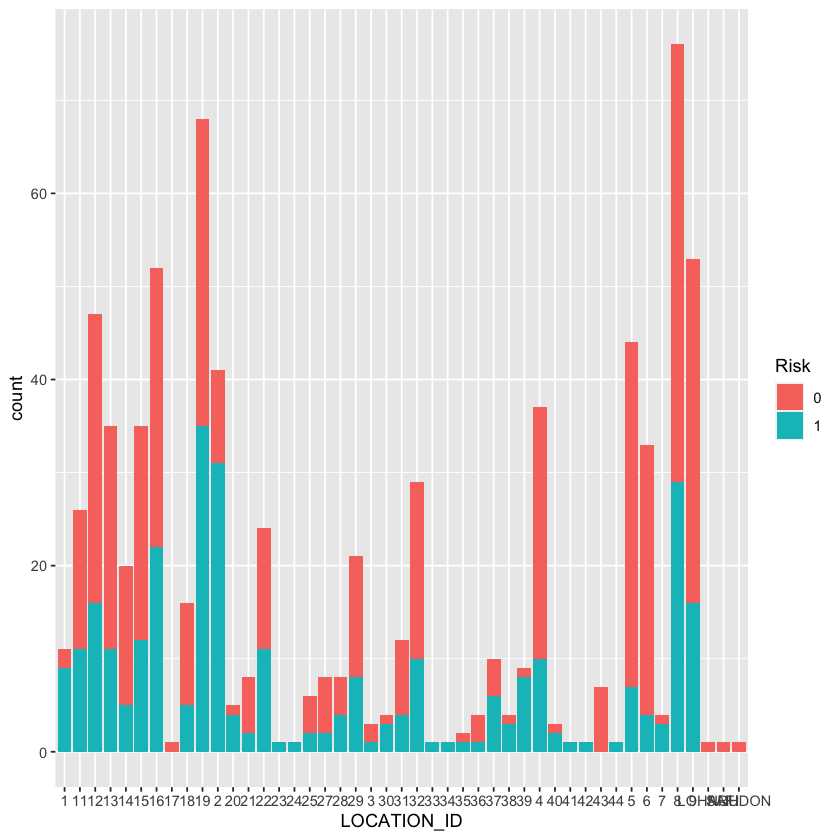

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 42 rows containing missing values (`geom_bar()`).”


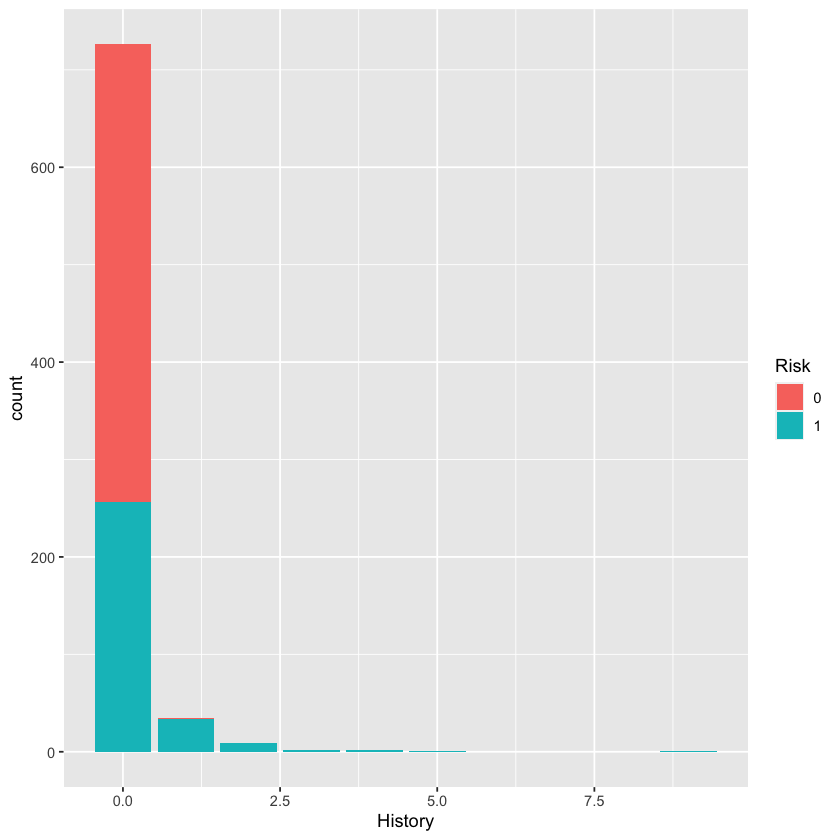

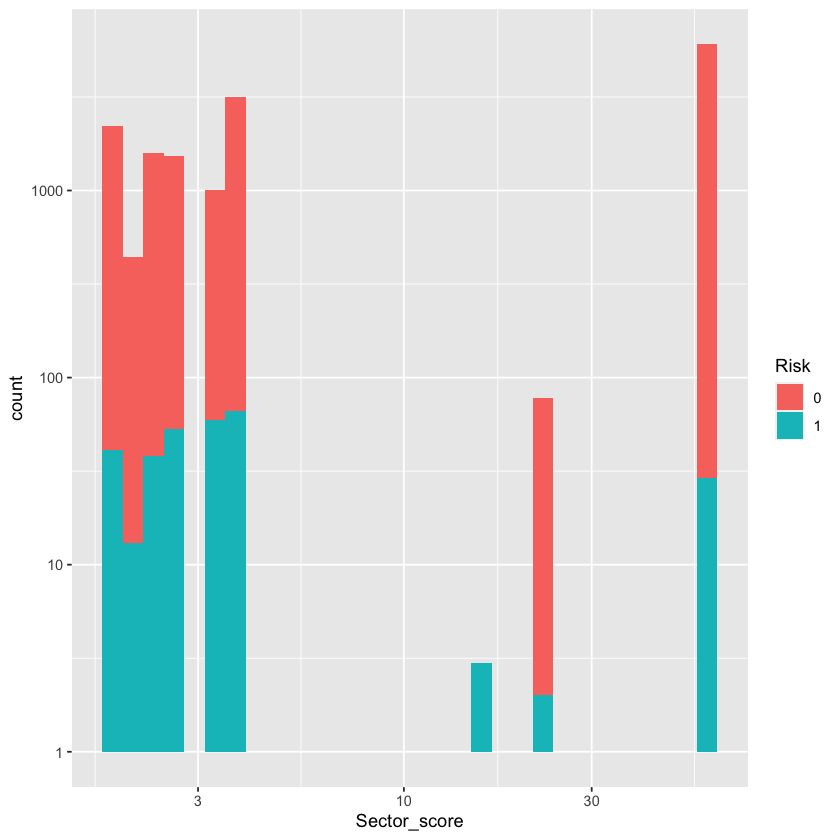

In [13]:
feature_plot1 <- audit |> ggplot(aes(x = TOTAL, y = Inherent_Risk, color = Risk)) + geom_point() + scale_x_log10() + scale_y_log10()
feature_plot1

feature_plot4 <- audit |> ggplot(aes(x = TOTAL, y = Audit_Risk, color = Risk)) + geom_point() + scale_x_log10() + scale_y_log10()
feature_plot4

feature_plot2 <- audit |> ggplot(aes(x = LOCATION_ID, fill = Risk)) + geom_bar()
feature_plot2

feature_plot2 <- audit |> ggplot(aes(x = History, fill = Risk)) + geom_bar()
feature_plot2

feature_plot3 <- audit |> ggplot(aes(x = Sector_score, fill = Risk)) + geom_histogram() + scale_x_log10() + scale_y_log10()
feature_plot3

### 3. Methods

### 4. Expected Outcomes and Significance 